# 1. Standard Scaling 
`standard scaling` is the process of normalizing the data to a scale of 0 to 1. This means that the mean of the data will be 0 and the standard deviation will be 1. This is done by subtracting the mean from each value and then dividing by the standard deviation.


In [1]:
# import libaries
import pandas as pd
from sklearn.preprocessing import StandardScaler , MinMaxScaler , MaxAbsScaler , RobustScaler

In [2]:
# make an example dataset

# make an example dataset
data = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}
df = pd.DataFrame(data)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [3]:
# import the scalar 
scaler = StandardScaler()

# fit and transform the data
scaled = scaler.fit_transform(df)

# print the scaled data 
print(scaled)

# convert the scaled data to a dataframe
scaled_df = pd.DataFrame(scaled, columns = df.columns)
scaled_df



[[-1.41421356 -1.41421356 -1.41421356]
 [-0.70710678 -0.70710678 -0.70710678]
 [ 0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.70710678]
 [ 1.41421356  1.41421356  1.41421356]]


,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# 2. MinMax Scaling

In [4]:
# make an example dataset
data = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}
df = pd.DataFrame(data)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [5]:
scaler = MinMaxScaler()

# fit and transform the data
scaled = scaler.fit_transform(df)


# convert the scaled data to a dataframe
scaled_df = pd.DataFrame(scaled, columns = df.columns)
scaled_df



,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# 3. MaxAbs Scaling

In [6]:
scaler = MaxAbsScaler()

# fit and transform the data
scaled = scaler.fit_transform(df)


# convert the scaled data to a dataframe
scaled_df = pd.DataFrame(scaled, columns = df.columns)
scaled_df



,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# 4. Robust Scaling

In [18]:
scaler = RobustScaler()

# fit and transform the data
scaled = scaler.fit_transform(df)


# convert the scaled data to a dataframe
scaled_df = pd.DataFrame(scaled, columns = df.columns)
scaled_df



,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


# Transformation 

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# generate non-normal data (exponential distribution)
np.random.seed(0)
df = np.random.exponential(size=1000 ,scale=2)
df = pd.DataFrame(df , columns = ['values'])
df.head()
df.shape

(1000, 1)

values    0.001092
dtype: float64

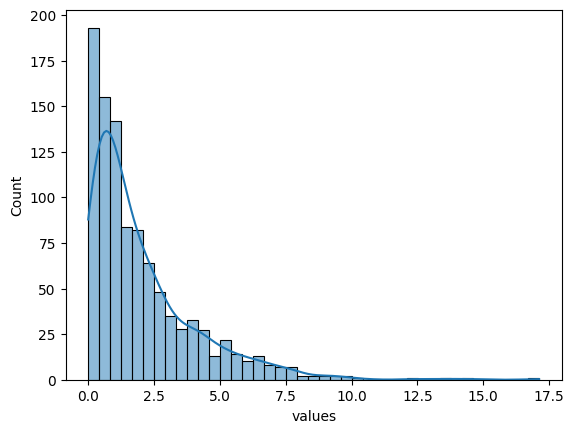

In [19]:
sns.histplot(df['values'] , kde=True)
df.min()

In [51]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox' , standardize=False)
pt_yeojohnson = PowerTransformer(method='yeo-johnson' , standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# fit the box-cox on the data
df['box_cox'] = pt_boxcox.fit_transform(df[['values']] +1  )
df['yeo_johnson'] = pt_yeojohnson.fit_transform(df[['values']])
df['QT'] =  qt_normal.fit_transform(df[['values']])

df.head()

,values,box_cox,yeo_johnson,QT
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


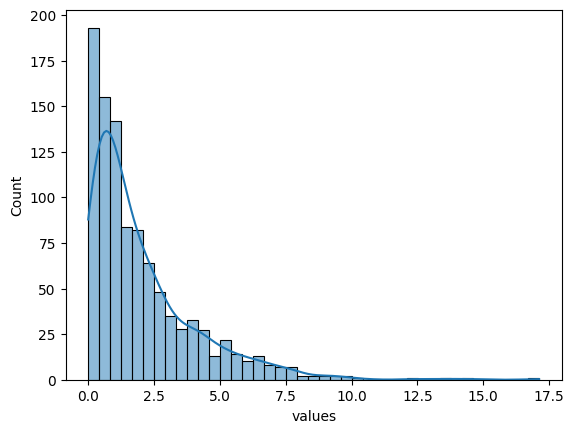

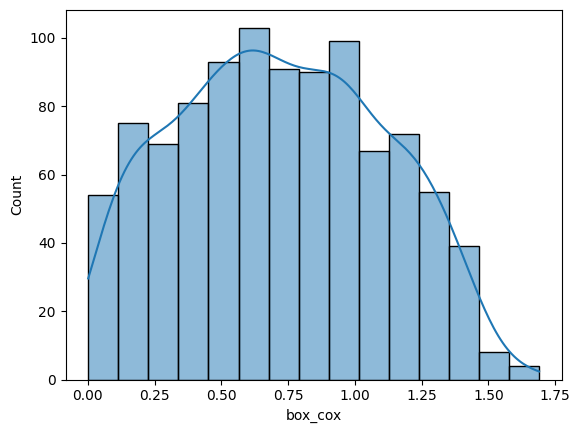

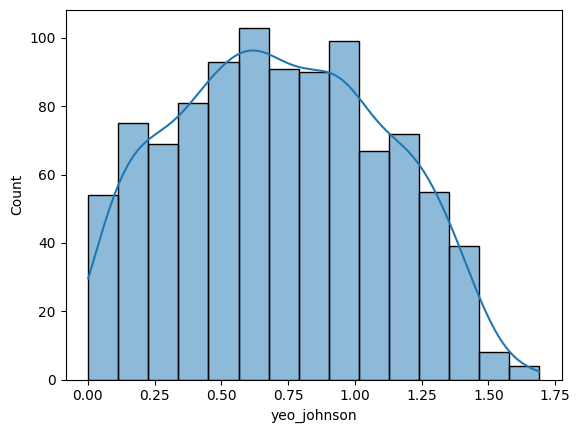

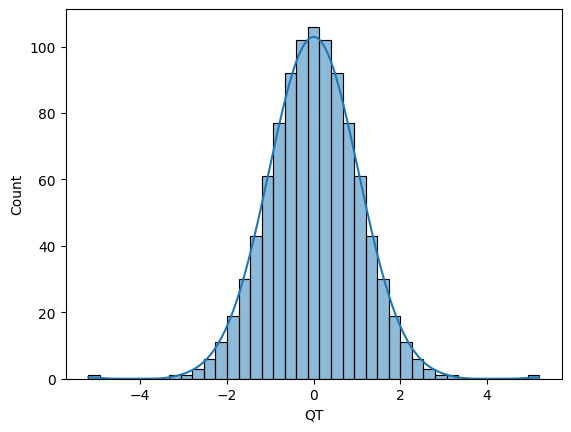

In [52]:
# create histgram for all columns using sns.hist and kde=True use a for loop

for col in df.columns:
    sns.histplot(df[col] , kde=True)
    plt.show()